In [1]:
#Bankruptcy Case
bankrupt.df <- read.csv("Bankruptcy.csv", header = TRUE)  # load Bankruptcy.csv
str(bankrupt.df) # get a sense of the columns of data
table(is.na(bankrupt.df))  # check for NAs and NaNs

'data.frame':	132 obs. of  27 variables:
 $ NO : int  1 2 3 4 5 6 7 8 9 10 ...
 $ D  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ YR : int  78 77 72 80 81 70 76 77 73 71 ...
 $ R1 : num  0.23 0.19 0.07 0.07 0.09 0.24 0.08 0.1 0.16 0.16 ...
 $ R2 : num  0.08 0.07 0.02 0.03 0.02 0.07 0.04 0.02 0.09 0.08 ...
 $ R3 : num  0.02 0.09 0.03 0.04 0.03 0.14 0.02 0.02 0.07 0.06 ...
 $ R4 : num  0.03 0.12 0.05 0.04 0.04 0.22 0.03 0.04 0.1 0.08 ...
 $ R5 : num  0.46 0.02 0.06 0.04 0.06 0.1 0.3 -0.05 0.1 0.03 ...
 $ R6 : num  0.12 0.02 0.1 0.06 0.08 0.18 0.13 -0.06 0.08 0.02 ...
 $ R7 : num  0.19 0.03 0.14 0.06 0.11 0.29 0.21 -0.09 0.11 0.03 ...
 $ R8 : num  10.36 3.13 2.41 5.55 2.85 ...
 $ R9 : num  1.17 1.73 1.36 1.13 1.88 1.37 0.82 1.17 1.64 1.58 ...
 $ R10: num  0.4 0.6 0.41 0.44 0.42 0.43 0.42 0.24 0.91 0.75 ...
 $ R11: num  0.1 0.78 0.66 0.58 0.62 0.79 0.18 0.27 0.72 0.55 ...
 $ R12: num  0.14 0.63 0.7 0.57 0.46 0.92 0.36 0.37 0.62 0.47 ...
 $ R13: num  0.13 0.05 -0.01 -0.02 0.01 0.03 0.03 -0.07 0.04 0.0


FALSE 
 3564 

In [2]:
# Thought: D is the decision variables (bankrupt yes/no)
# Thought: only 132 records, but well balanced (66 bankrupt, 66 healthy firms)
# Thought: will probably want to normalize the variables as some have larger ranges relative to others
# Thought: no NAs or NaNs (missing tems/numbers)
# Thought: have to get rid of column NO (just an identifier)
# Thought: while the year variable may tell us something related to the economic cycle, it is less fincnial than R1-R24, and may need to be stripped.

#Checking out the data
dim(bankrupt.df)  # find the dimension of data frame
head(bankrupt.df)  # take a peak at the first six rows
colnames(bankrupt.df) # print column names
summary(bankrupt.df) #get descriptive statistics of column variables

[1] 132  27

NO,D,YR,R1,R2,R3,R4,R5,R6,R7,⋯,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,⋯,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,⋯,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,⋯,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,⋯,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,⋯,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
6,0,70,0.24,0.07,0.14,0.22,0.10,0.18,0.29,⋯,0.10,0.06,0.11,0.18,9.82,1.82,1.60,0.06,0.11,0.18


[1] "NO"  "D"   "YR"  "R1"  "R2"  "R3"  "R4"  "R5"  "R6"  "R7"  "R8"  "R9" 
[13] "R10" "R11" "R12" "R13" "R14" "R15" "R16" "R17" "R18" "R19" "R20" "R21"
[25] "R22" "R23" "R24"

       NO               D             YR              R1        
 Min.   :  1.00   Min.   :0.0   Min.   :70.00   Min.   :0.0000  
 1st Qu.: 33.75   1st Qu.:0.0   1st Qu.:72.00   1st Qu.:0.0700  
 Median : 66.50   Median :0.5   Median :74.00   Median :0.1500  
 Mean   : 66.50   Mean   :0.5   Mean   :74.02   Mean   :0.2917  
 3rd Qu.: 99.25   3rd Qu.:1.0   3rd Qu.:76.00   3rd Qu.:0.2725  
 Max.   :132.00   Max.   :1.0   Max.   :82.00   Max.   :4.9200  
       R2                R3                R4               R5          
 Min.   :0.00000   Min.   :0.00000   Min.   :0.0000   Min.   :-1.40000  
 1st Qu.:0.02000   1st Qu.:0.03000   1st Qu.:0.0400   1st Qu.: 0.01000  
 Median :0.03000   Median :0.05000   Median :0.0800   Median : 0.03000  
 Mean   :0.06136   Mean   :0.07379   Mean   :0.1558   Mean   : 0.04152  
 3rd Qu.:0.06000   3rd Qu.:0.09000   3rd Qu.:0.1725   3rd Qu.: 0.08000  
 Max.   :1.00000   Max.   :0.64000   Max.   :1.3800   Max.   : 0.46000  
       R6                 R7      

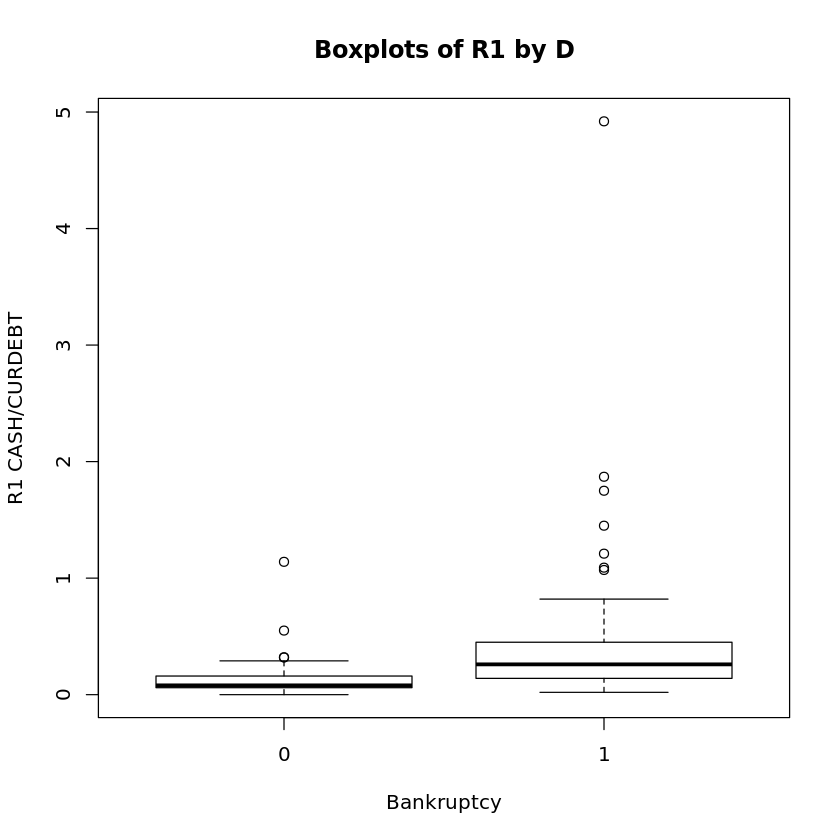

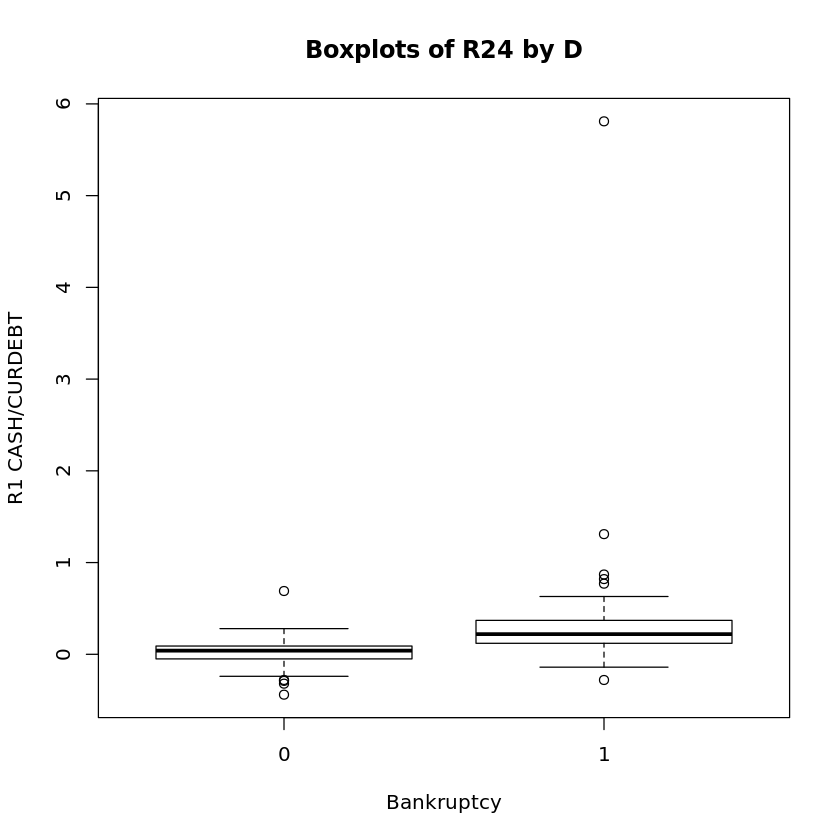

In [3]:
library(ggplot2)

# Create a box plots matrix of some of the columns, broken out by bankruptcy status 
boxplot(R1~D,data=bankrupt.df, main="Boxplots of R1 by D",xlab="Bankruptcy", ylab="R1 CASH/CURDEBT")
# etc etc
boxplot(R24~D,data=bankrupt.df, main="Boxplots of R24 by D",xlab="Bankruptcy", ylab="R1 CASH/CURDEBT")

In [6]:
#Checking for single-variable outliers 
test.df <- bankrupt.df
test.df$R1 <- scale(bankrupt.df$R1,center = TRUE, scale = TRUE)
test.df$R2 <- scale(bankrupt.df$R2,center = TRUE, scale = TRUE)
test.df$R3 <- scale(bankrupt.df$R3,center = TRUE, scale = TRUE)
test.df$R4 <- scale(bankrupt.df$R4,center = TRUE, scale = TRUE)
test.df$R5 <- scale(bankrupt.df$R5,center = TRUE, scale = TRUE)
test.df$R6 <- scale(bankrupt.df$R6,center = TRUE, scale = TRUE)
test.df$R7 <- scale(bankrupt.df$R7,center = TRUE, scale = TRUE)
test.df$R8 <- scale(bankrupt.df$R8,center = TRUE, scale = TRUE)
test.df$R9 <- scale(bankrupt.df$R9,center = TRUE, scale = TRUE)
test.df$R10 <- scale(bankrupt.df$R10,center = TRUE, scale = TRUE)
test.df$R11 <- scale(bankrupt.df$R11,center = TRUE, scale = TRUE)
test.df$R12 <- scale(bankrupt.df$R12,center = TRUE, scale = TRUE)
test.df$R13 <- scale(bankrupt.df$R13,center = TRUE, scale = TRUE)
test.df$R14 <- scale(bankrupt.df$R14,center = TRUE, scale = TRUE)
test.df$R15 <- scale(bankrupt.df$R15,center = TRUE, scale = TRUE)
test.df$R16 <- scale(bankrupt.df$R16,center = TRUE, scale = TRUE)
test.df$R17 <- scale(bankrupt.df$R17,center = TRUE, scale = TRUE)
test.df$R18 <- scale(bankrupt.df$R18,center = TRUE, scale = TRUE)
test.df$R19 <- scale(bankrupt.df$R19,center = TRUE, scale = TRUE)
test.df$R20 <- scale(bankrupt.df$R20,center = TRUE, scale = TRUE)
test.df$R21 <- scale(bankrupt.df$R21,center = TRUE, scale = TRUE)
test.df$R22 <- scale(bankrupt.df$R22,center = TRUE, scale = TRUE)
test.df$R23 <- scale(bankrupt.df$R23,center = TRUE, scale = TRUE)
test.df$R24 <- scale(bankrupt.df$R24,center = TRUE, scale = TRUE)   
summary(test.df)

# View is not supported in Jupyter R
# View(test.df)

       NO               D             YR               R1.V1       
 Min.   :  1.00   Min.   :0.0   Min.   :70.00   Min.   :-0.563326  
 1st Qu.: 33.75   1st Qu.:0.0   1st Qu.:72.00   1st Qu.:-0.428163  
 Median : 66.50   Median :0.5   Median :74.00   Median :-0.273691  
 Mean   : 66.50   Mean   :0.5   Mean   :74.02   Mean   : 0.000000  
 3rd Qu.: 99.25   3rd Qu.:1.0   3rd Qu.:76.00   3rd Qu.:-0.037155  
 Max.   :132.00   Max.   :1.0   Max.   :82.00   Max.   : 8.936709  
        R2.V1               R3.V1               R4.V1       
 Min.   :-0.494194   Min.   :-0.911803   Min.   :-0.735541  
 1st Qu.:-0.333123   1st Qu.:-0.541090   1st Qu.:-0.546739  
 Median :-0.252588   Median :-0.293949   Median :-0.357937  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.:-0.010982   3rd Qu.: 0.200334   3rd Qu.: 0.078668  
 Max.   : 7.559337   Max.   : 6.996727   Max.   : 5.778129  
        R5.V1               R6.V1               R7.V1       
 Min.   :-8.694115   Min.   :-5.7858

In [8]:
#Some variable cleanups
bankrupt.df$NO <- NULL #Strip column NO
# Fortunate & awesome: D, the outcome variable, is now the first column
# Convert D to a factor as that seems to be needed for he function confusionMatrix to work
bankrupt.df$D=as.factor(bankrupt.df$D)   

In [9]:
#rescale (normalize)
library(scales)
# View(bankrupt.df)
bankrupt.df$R1 <- rescale(bankrupt.df$R1,to=c(0,1)) 
bankrupt.df$R2 <- rescale(bankrupt.df$R2,to=c(0,1)) 
bankrupt.df$R3 <- rescale(bankrupt.df$R3,to=c(0,1)) 
bankrupt.df$R4 <- rescale(bankrupt.df$R4,to=c(0,1)) 
bankrupt.df$R5 <- rescale(bankrupt.df$R5,to=c(0,1)) 
bankrupt.df$R6 <- rescale(bankrupt.df$R6,to=c(0,1)) 
bankrupt.df$R7 <- rescale(bankrupt.df$R7,to=c(0,1)) 
bankrupt.df$R8 <- rescale(bankrupt.df$R8,to=c(0,1)) 
bankrupt.df$R9 <- rescale(bankrupt.df$R9,to=c(0,1)) 
bankrupt.df$R10 <- rescale(bankrupt.df$R10,to=c(0,1)) 
bankrupt.df$R11 <- rescale(bankrupt.df$R11,to=c(0,1))
bankrupt.df$R12 <- rescale(bankrupt.df$R12,to=c(0,1)) 
bankrupt.df$R13 <- rescale(bankrupt.df$R13,to=c(0,1)) 
bankrupt.df$R14 <- rescale(bankrupt.df$R14,to=c(0,1)) 
bankrupt.df$R15 <- rescale(bankrupt.df$R15,to=c(0,1)) 
bankrupt.df$R16 <- rescale(bankrupt.df$R16,to=c(0,1)) 
bankrupt.df$R17 <- rescale(bankrupt.df$R17,to=c(0,1)) 
bankrupt.df$R18 <- rescale(bankrupt.df$R18,to=c(0,1)) 
bankrupt.df$R19 <- rescale(bankrupt.df$R19,to=c(0,1)) 
bankrupt.df$R20 <- rescale(bankrupt.df$R20,to=c(0,1)) 
bankrupt.df$R21 <- rescale(bankrupt.df$R21,to=c(0,1)) 
bankrupt.df$R22 <- rescale(bankrupt.df$R22,to=c(0,1)) 
bankrupt.df$R23 <- rescale(bankrupt.df$R23,to=c(0,1))
bankrupt.df$R24 <- rescale(bankrupt.df$R24,to=c(0,1)) 
summary(bankrupt.df) #check all mins and maxs are 0 and 1, respectively.

 D            YR              R1                R2                R3         
 0:66   Min.   :70.00   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1:66   1st Qu.:72.00   1st Qu.:0.01423   1st Qu.:0.02000   1st Qu.:0.04688  
        Median :74.00   Median :0.03049   Median :0.03000   Median :0.07812  
        Mean   :74.02   Mean   :0.05930   Mean   :0.06136   Mean   :0.11529  
        3rd Qu.:76.00   3rd Qu.:0.05539   3rd Qu.:0.06000   3rd Qu.:0.14062  
        Max.   :82.00   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
       R4                R5               R6               R7        
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.02899   1st Qu.:0.7581   1st Qu.:0.5596   1st Qu.:0.3559  
 Median :0.05797   Median :0.7688   Median :0.6055   Median :0.3955  
 Mean   :0.11292   Mean   :0.7750   Mean   :0.5965   Mean   :0.4120  
 3rd Qu.:0.12500   3rd Qu.:0.7957   3rd Qu.:0.6445   3rd Qu.:0.4633  
 Max.   :1.00000   Max.   :1.0000 

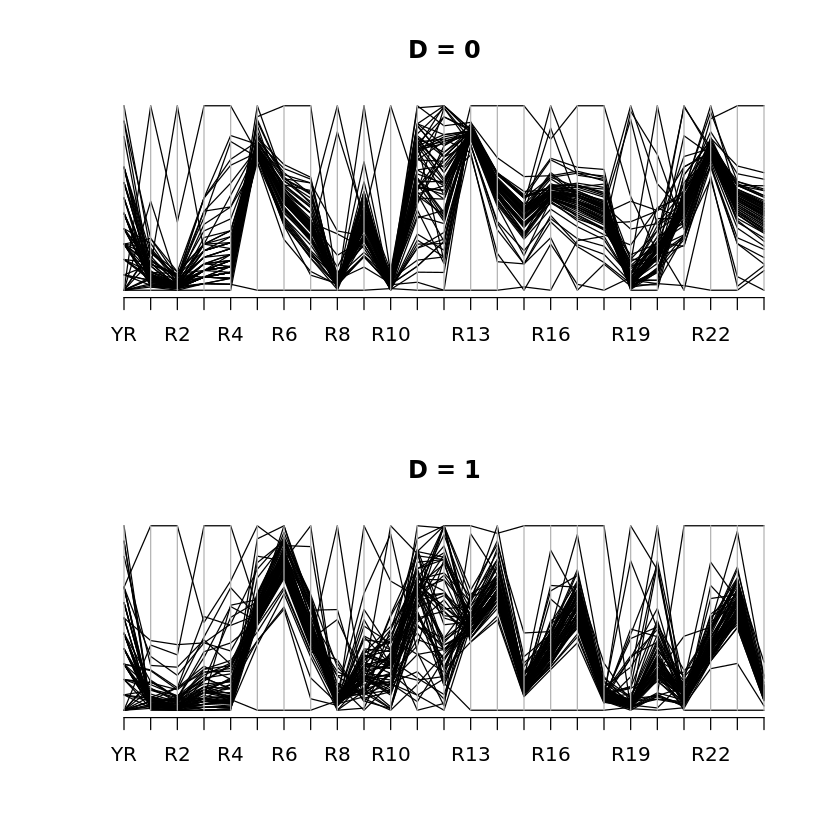

In [11]:
#Checking for multi-variable outliers using coordinate plot
#You will probably have to resize the plotting window, and have to use zoom.
library(MASS)
par(mfcol = c(2,1))
parcoord(bankrupt.df[bankrupt.df$D == 0,-1],main = "D = 0")
parcoord(bankrupt.df[bankrupt.df$D == 1,-1],main = "D = 1")

## Keep in mind, as you treat outliers, that you only have about 130 rows of data!

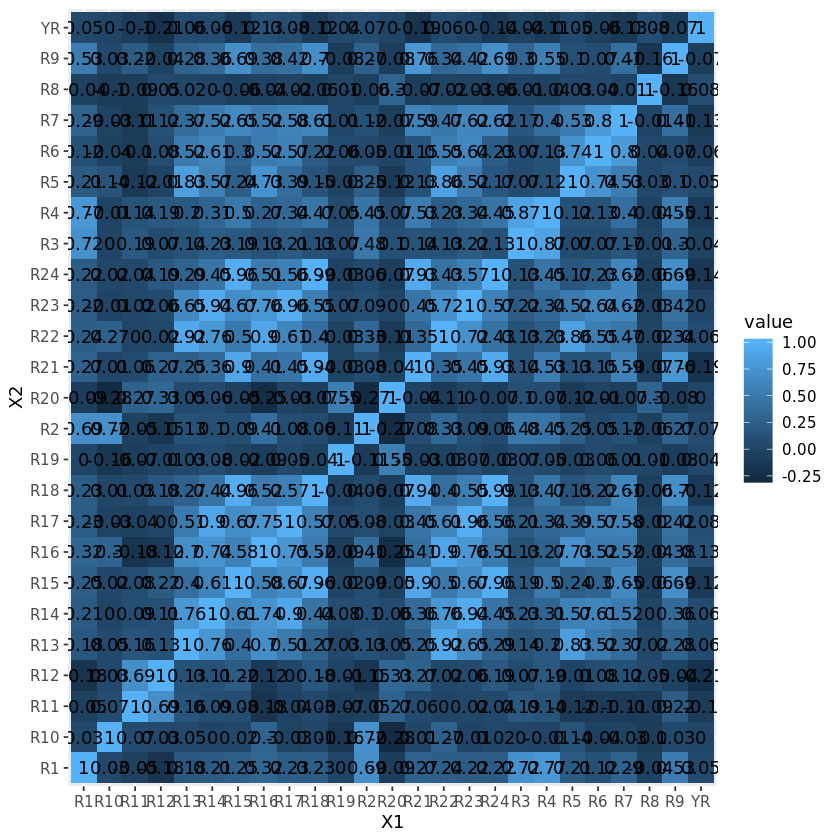

In [13]:
#Checking for highly correlated columns

# These installs happen as part of setting up the binder workspace (see install.R)
#install.packages("reshape")
#install.packages("tidyr")
library(reshape)
library(ggplot2)
cor.mat <- round(cor(bankrupt.df[,-1]),2)
melted.cor.mat <- melt(cor.mat)
ggplot(melted.cor.mat,aes(x=X1,y=X2,fill=value))+geom_tile() + geom_text(aes(x=X1,y=X2,label=value))
# Thought: several variables have correlations in the .9s, providing some guidance for thinning the variables.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



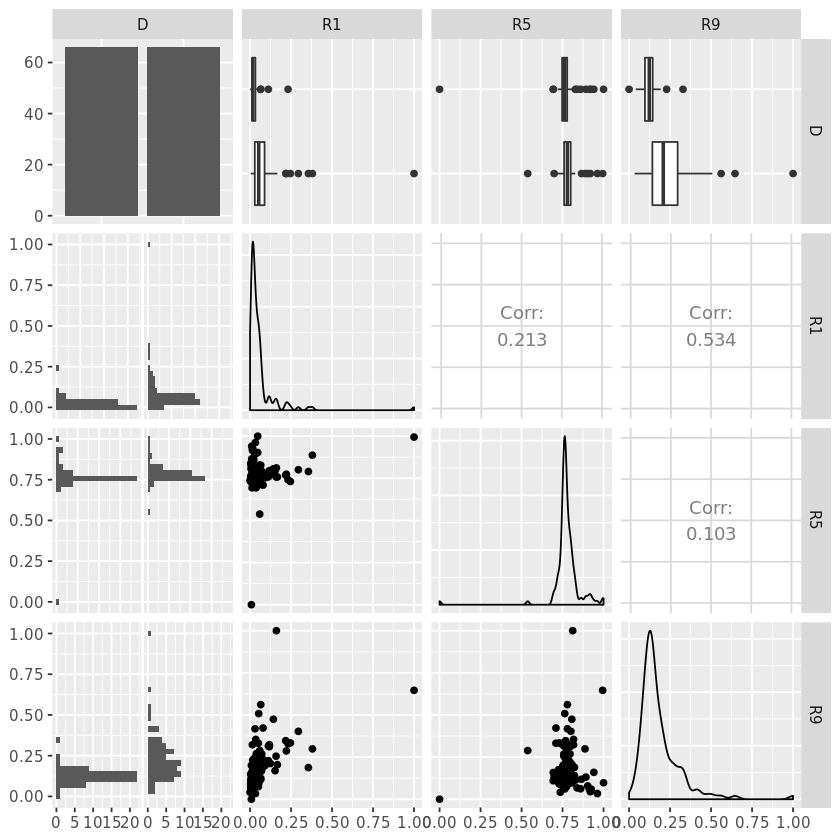

In [15]:
# Matrix scatterplots
# Suppose you want to produce a scatterplot matrix of D versus columns 3, 7, and 11
# install.packages("GGally")
library(ggplot2)
library(GGally)
ggpairs(bankrupt.df[,c(1,3,7,11)])

In [16]:
#Principal components analysis
pcs.cor <- prcomp(bankrupt.df[,-c(1,2)],scale. = T)
summary(pcs.cor)
# Looks like PC1 through PC7 picks up more than 85% of the cumulative variance
bankrupt.df <- cbind(bankrupt.df[1:2],pcs.cor$x[,1:7]) #I decided to keep YR

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9846 1.7708 1.6492 1.47268 1.30930 1.04699 1.02900
Proportion of Variance 0.3712 0.1307 0.1133 0.09037 0.07143 0.04567 0.04412
Cumulative Proportion  0.3712 0.5018 0.6151 0.70551 0.77694 0.82262 0.86674
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.9625 0.89910 0.69731 0.51962 0.48177 0.39314 0.33854
Proportion of Variance 0.0386 0.03368 0.02026 0.01125 0.00967 0.00644 0.00478
Cumulative Proportion  0.9053 0.93902 0.95928 0.97053 0.98020 0.98664 0.99142
                         PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.2498 0.21756 0.17159 0.15977 0.12564 0.09732 0.08479
Proportion of Variance 0.0026 0.00197 0.00123 0.00106 0.00066 0.00039 0.00030
Cumulative Proportion  0.9940 0.99599 0.99722 0.99828 0.99894 0.99933 0.99963
                          PC22    PC23    PC24

In [17]:
#Partition into training and validation. Using a random partition of 60% for training, rest for validation
#Sample the data to get a training and validation data set
#Very thin data set. May have to stick to just two partitions.
set.seed(1)
training.rows <- sample(rownames(bankrupt.df),dim(bankrupt.df)[1]*0.6)
training <- bankrupt.df[training.rows,]
validate.rows <- setdiff(row.names(bankrupt.df),training.rows)
validate <- bankrupt.df[validate.rows,]
dim(training)
dim(validate)

[1] 79  9

[1] 53  9

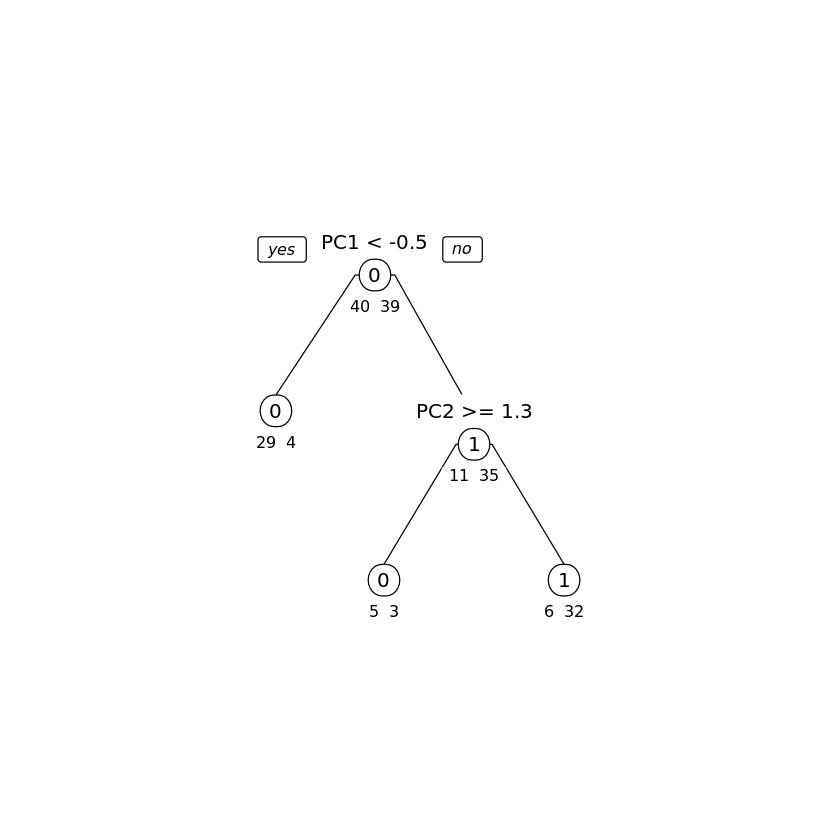

In [20]:
#Run a basic tree classifier
library(rpart)
library(rpart.plot)
default.ct <- rpart(D ~ .,data=training,method="class")
prp(default.ct,type=1,extra=1,under=TRUE,split.font=1,varlen=-10)

In [21]:
#Now classify records in validate using the tree
library(caret)
default.ct.point.pred.train <- predict(default.ct,training,type="class")
confusionMatrix(default.ct.point.pred.train,training$D)
default.ct.point.pred.validate <- predict(default.ct,validate,type="class")
confusionMatrix(default.ct.point.pred.validate,validate$D)

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  7
         1  6 32
                                          
               Accuracy : 0.8354          
                 95% CI : (0.7351, 0.9094)
    No Information Rate : 0.5063          
    P-Value [Acc > NIR] : 1.054e-09       
                                          
                  Kappa : 0.6707          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8500          
            Specificity : 0.8205          
         Pos Pred Value : 0.8293          
         Neg Pred Value : 0.8421          
             Prevalence : 0.5063          
         Detection Rate : 0.4304          
   Detection Prevalence : 0.5190          
      Balanced Accuracy : 0.8353          
                                          
       'Positive' Class : 0               
                                          

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 20  4
         1  6 23
                                          
               Accuracy : 0.8113          
                 95% CI : (0.6803, 0.9056)
    No Information Rate : 0.5094          
    P-Value [Acc > NIR] : 5.178e-06       
                                          
                  Kappa : 0.622           
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.7692          
            Specificity : 0.8519          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.7931          
             Prevalence : 0.4906          
         Detection Rate : 0.3774          
   Detection Prevalence : 0.4528          
      Balanced Accuracy : 0.8105          
                                          
       'Positive' Class : 0               
                                          

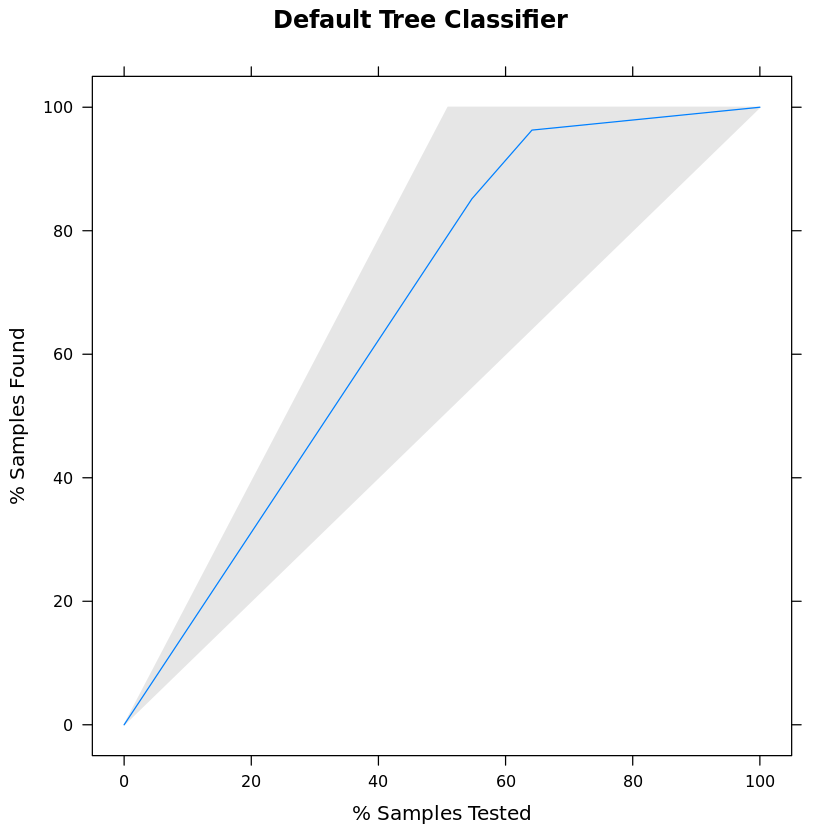

In [22]:
#Lift chart for default CART classifier
library(caret)
probabilities <- predict(default.ct,validate,type="prob")
lift.data <- data.frame(validate[,1],probabilities[,2])
colnames(lift.data) <- c("actual","prob")
lift.CARTdefault <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
xyplot(lift.CARTdefault,plot="gain",main="Default Tree Classifier")


Classification tree:
rpart(formula = D ~ ., data = bankrupt.df, method = "class", 
    cp = 1e-05, minsplit = 3, xval = 5)

Variables actually used in tree construction:
[1] PC1 PC2 PC3 PC4 PC5 PC6 PC7

Root node error: 66/132 = 0.5

n= 132 

         CP nsplit rel error  xerror     xstd
1 0.6363636      0  1.000000 1.06061 0.086879
2 0.0378788      1  0.363636 0.43939 0.072075
3 0.0303030      4  0.242424 0.59091 0.079422
4 0.0252525      5  0.212121 0.59091 0.079422
5 0.0151515      8  0.136364 0.59091 0.079422
6 0.0050505     14  0.045455 0.57576 0.078818
7 0.0000100     17  0.030303 0.62121 0.080553


[1] 2

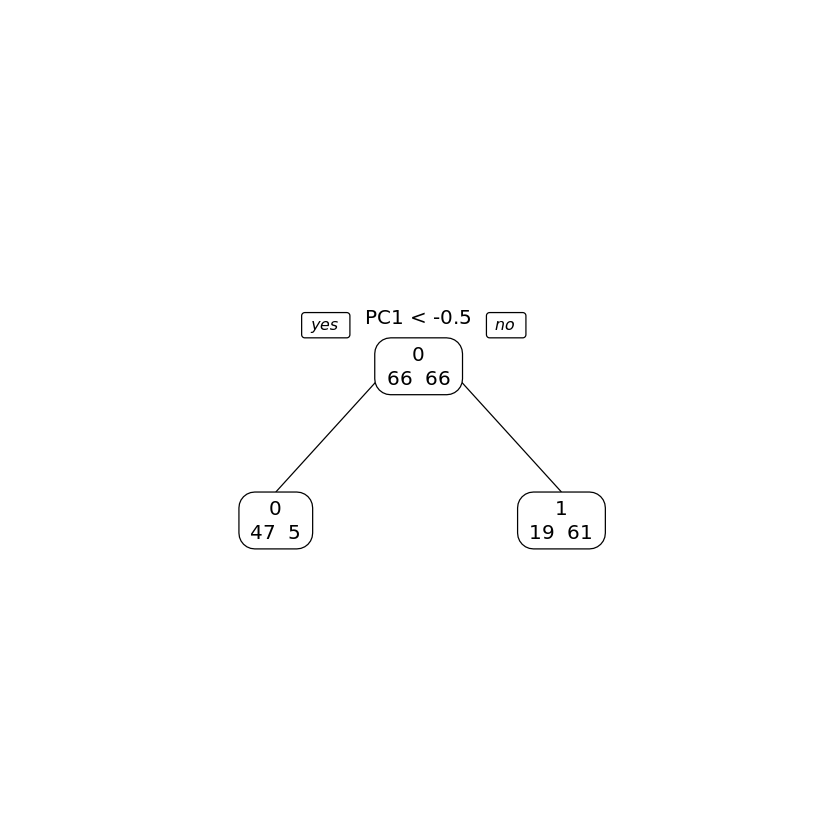

In [23]:
#First tabulate error as a functon of the complexity parameter CP
cv.ct <- rpart(D~.,data=bankrupt.df,method="class",cp=0.00001,minsplit=3,xval=5)
printcp(cv.ct)
# Now let's try a pruned tree (based upon Figure9.12)
pruned.ct <- prune(cv.ct,cp=cv.ct$cptable[which.min(cv.ct$cptable[,"xerror"]),"CP"])
length(pruned.ct$frame$var[pruned.ct$frame$var == "<leaf>"])
prp(pruned.ct,type=1,extra=1,split.font=1,varlen=-10)

In [24]:
#Now classify records in validate using the pruned tree
pruned.ct.point.pred.train <- predict(pruned.ct,training,type="class")
confusionMatrix(pruned.ct.point.pred.train,training$D)
pruned.ct.point.pred.validate <- predict(pruned.ct,validate,type="class")
confusionMatrix(pruned.ct.point.pred.validate,validate$D)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 29  4
         1 11 35
                                          
               Accuracy : 0.8101          
                 95% CI : (0.7062, 0.8897)
    No Information Rate : 0.5063          
    P-Value [Acc > NIR] : 2.144e-08       
                                          
                  Kappa : 0.621           
 Mcnemar's Test P-Value : 0.1213          
                                          
            Sensitivity : 0.7250          
            Specificity : 0.8974          
         Pos Pred Value : 0.8788          
         Neg Pred Value : 0.7609          
             Prevalence : 0.5063          
         Detection Rate : 0.3671          
   Detection Prevalence : 0.4177          
      Balanced Accuracy : 0.8112          
                                          
       'Positive' Class : 0               
                                          

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 18  1
         1  8 26
                                         
               Accuracy : 0.8302         
                 95% CI : (0.702, 0.9193)
    No Information Rate : 0.5094         
    P-Value [Acc > NIR] : 1.181e-06      
                                         
                  Kappa : 0.6586         
 Mcnemar's Test P-Value : 0.0455         
                                         
            Sensitivity : 0.6923         
            Specificity : 0.9630         
         Pos Pred Value : 0.9474         
         Neg Pred Value : 0.7647         
             Prevalence : 0.4906         
         Detection Rate : 0.3396         
   Detection Prevalence : 0.3585         
      Balanced Accuracy : 0.8276         
                                         
       'Positive' Class : 0              
                                         

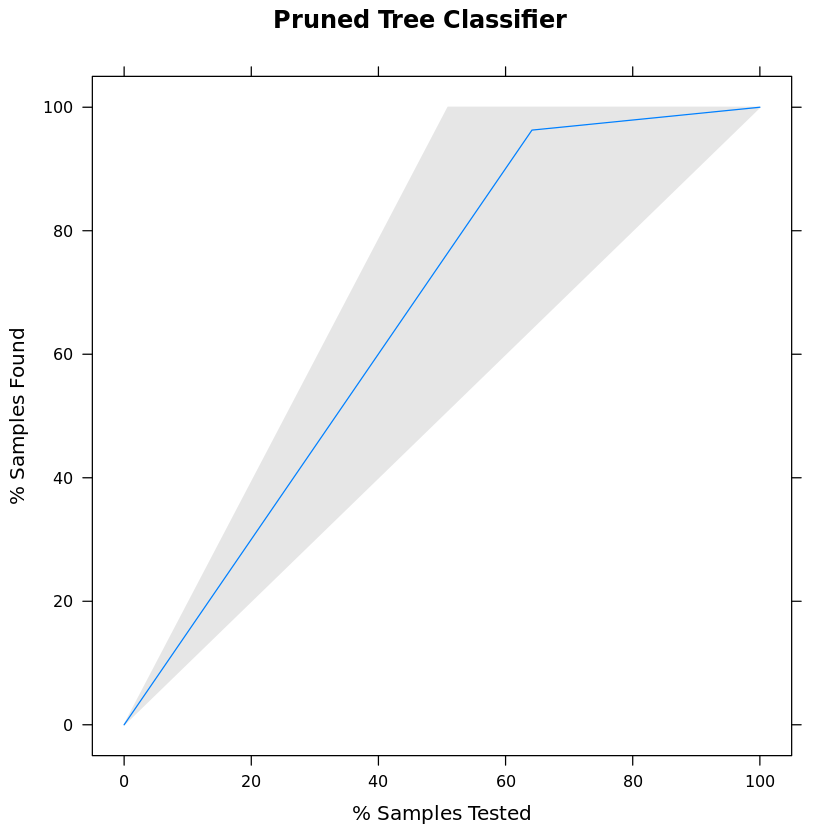

In [25]:
#Lift chart for pruned CART classifier
library(caret)
probabilities <- predict(pruned.ct,validate,type="prob")
lift.data <- data.frame(validate[,1],probabilities[,2])
colnames(lift.data) <- c("actual","prob")
lift.CARTpruned <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
xyplot(lift.CARTpruned,plot="gain",main="Pruned Tree Classifier")

In [28]:
#Logistic regression classifier
library(gains)
logit.reg <- glm(D~.,data=training,family="binomial")
options(scipen=999)  # Turn off scientific notation
pred <- predict(logit.reg,validate,type="response")
confusionMatrix(as.factor(ifelse(pred>0.5,1,0)),validate$D)
# Note: 0.5 in the previous line is the cutoff parameter - a hyperparameter

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  5
         1  5 22
                                          
               Accuracy : 0.8113          
                 95% CI : (0.6803, 0.9056)
    No Information Rate : 0.5094          
    P-Value [Acc > NIR] : 0.000005178     
                                          
                  Kappa : 0.6225          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8077          
            Specificity : 0.8148          
         Pos Pred Value : 0.8077          
         Neg Pred Value : 0.8148          
             Prevalence : 0.4906          
         Detection Rate : 0.3962          
   Detection Prevalence : 0.4906          
      Balanced Accuracy : 0.8113          
                                          
       'Positive' Class : 0               
                                          

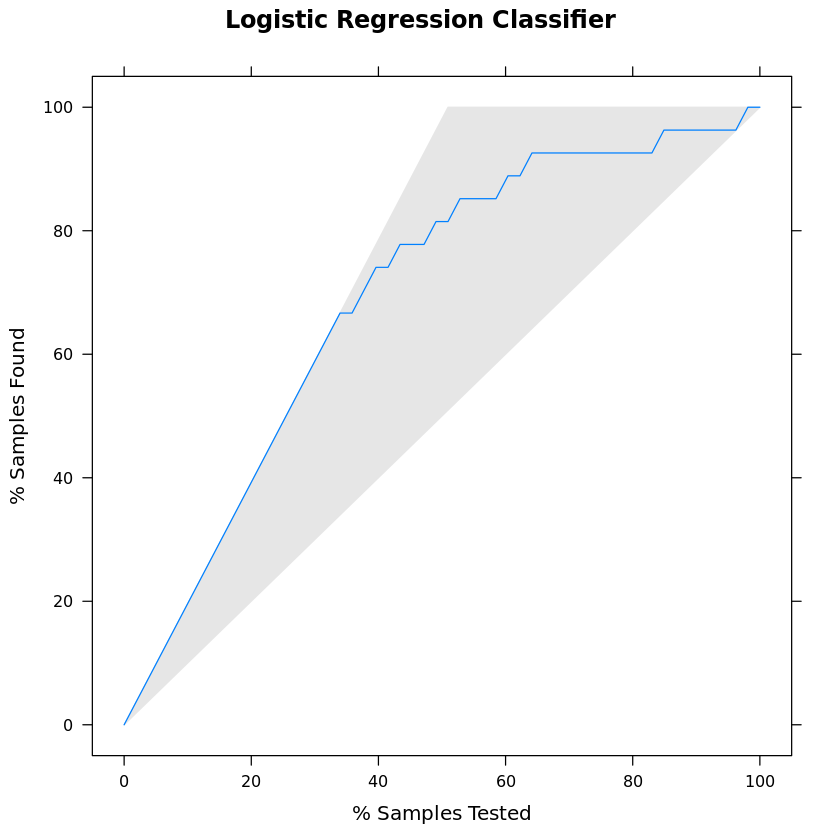

In [29]:
#Lift chart for the logistic regressionclassifier
probabilities <- predict(logit.reg,validate,type="response")
lift.data <- data.frame(validate[,1],probabilities)
colnames(lift.data) <- c("actual","prob")
lift.logit <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
xyplot(lift.logit,plot="gain",main="Logistic Regression Classifier")

In [30]:
# kNN classifier
# I chose to implement the kNN classifier in the caret package because it optimizes for k
library(caret)
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
knn_fit <- train(D ~.,data = training,method = "knn",
                 trControl=trctrl,
                 preProcess = c("center", "scale"),
                 tuneLength = 10)
# The next command shows the tabulated values of k and the optimal value of k
knn_fit

k-Nearest Neighbors 

79 samples
 8 predictors
 2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 71, 71, 71, 71, 71, 71, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.5958333  0.1843434
   7  0.5958333  0.1825758
   9  0.6166667  0.2242424
  11  0.6297619  0.2519763
  13  0.6470238  0.2871212
  15  0.6309524  0.2565217
  17  0.7142857  0.4231884
  19  0.7130952  0.4204106
  21  0.7119048  0.4169192
  23  0.7172619  0.4269763

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 23.

In [31]:
# Now examine confusion matrix
test_pred <- predict(knn_fit, newdata = validate)
confusionMatrix(test_pred,validate$D)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 20 11
         1  6 16
                                          
               Accuracy : 0.6792          
                 95% CI : (0.5368, 0.8008)
    No Information Rate : 0.5094          
    P-Value [Acc > NIR] : 0.009222        
                                          
                  Kappa : 0.3605          
 Mcnemar's Test P-Value : 0.331975        
                                          
            Sensitivity : 0.7692          
            Specificity : 0.5926          
         Pos Pred Value : 0.6452          
         Neg Pred Value : 0.7273          
             Prevalence : 0.4906          
         Detection Rate : 0.3774          
   Detection Prevalence : 0.5849          
      Balanced Accuracy : 0.6809          
                                          
       'Positive' Class : 0               
                                          

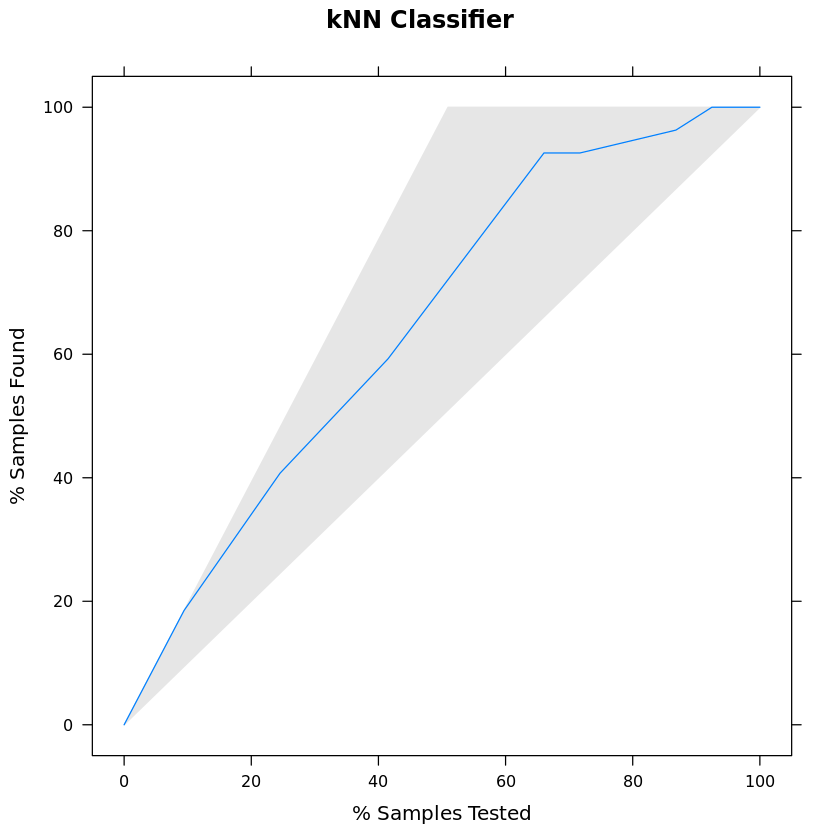

In [32]:
# Present the lift chart
probabilities <- predict(knn_fit, newdata = validate,type="prob")
lift.data <- data.frame(validate[,1],probabilities[,2])
colnames(lift.data) <- c("actual","prob")
lift.logit <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
xyplot(lift.logit,plot="gain",main="kNN Classifier")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 20  1
         1  6 26
                                          
               Accuracy : 0.8679          
                 95% CI : (0.7466, 0.9452)
    No Information Rate : 0.5094          
    P-Value [Acc > NIR] : 0.00000004165   
                                          
                  Kappa : 0.7348          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.7692          
            Specificity : 0.9630          
         Pos Pred Value : 0.9524          
         Neg Pred Value : 0.8125          
             Prevalence : 0.4906          
         Detection Rate : 0.3774          
   Detection Prevalence : 0.3962          
      Balanced Accuracy : 0.8661          
                                          
       'Positive' Class : 0               
                                          

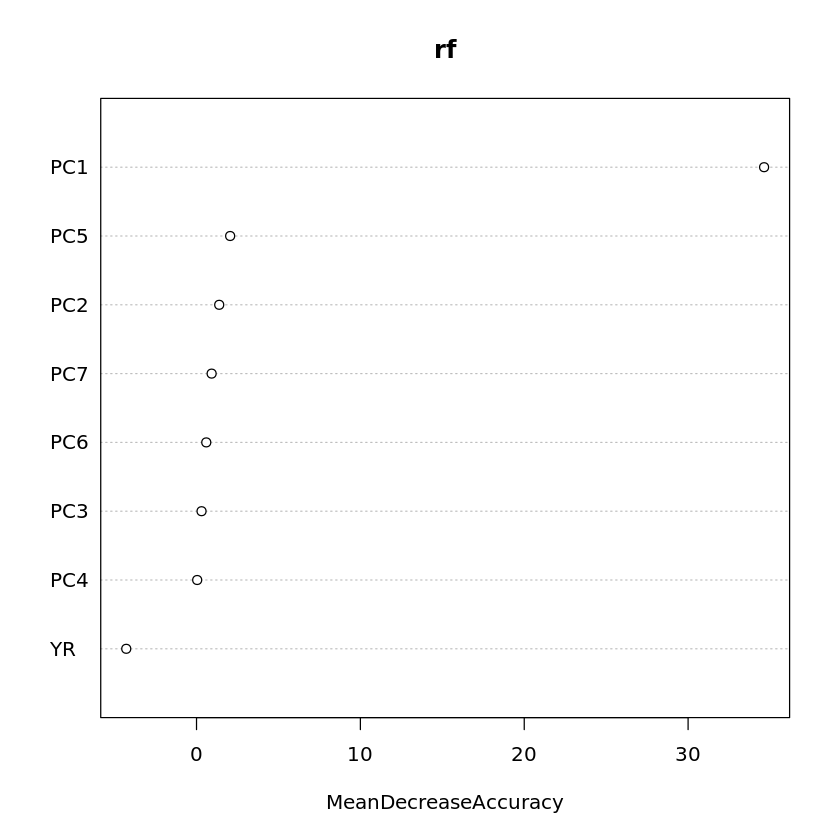

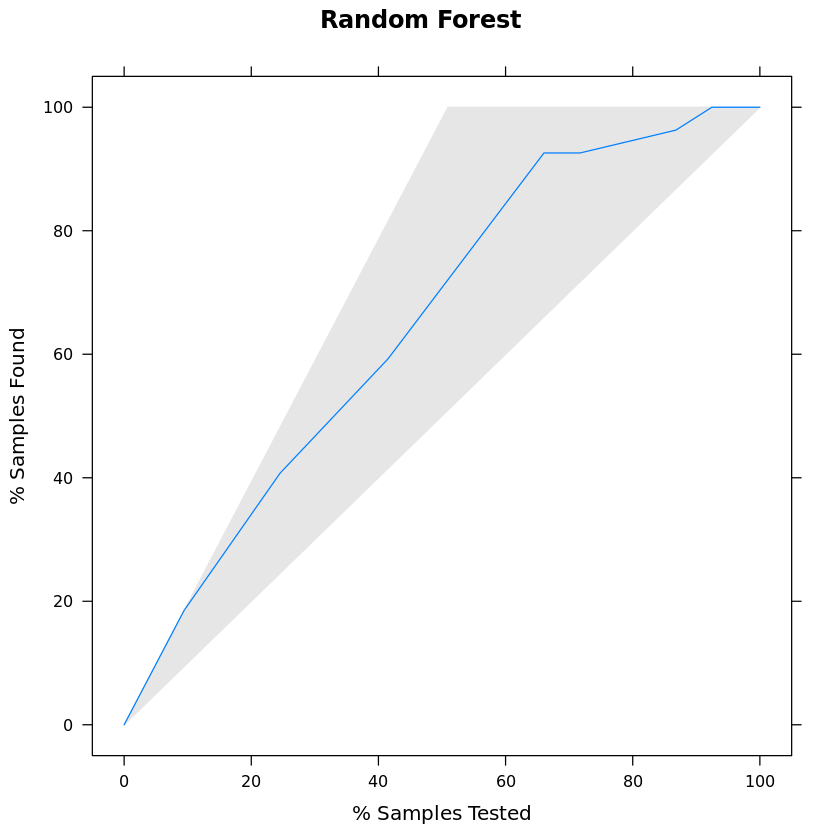

In [33]:
#Random Forest
library(randomForest)
rf <- randomForest(D~.,data=training,ntree=500,mtry=4,nodeize=5,importance=TRUE,norm.votes=TRUE)
varImpPlot(rf,type=1)
rf.pred <- predict(rf,validate)
confusionMatrix(rf.pred,validate$D)
# Now create the associated liftchart
probabilities <- predict(rf,validate,type="prob")[,2]
plift.data <- data.frame(validate[,1],probabilities)
colnames(lift.data) <- c("actual","prob")
lift.logit <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
xyplot(lift.logit,plot="gain",main="Random Forest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 19  3
         1  7 24
                                          
               Accuracy : 0.8113          
                 95% CI : (0.6803, 0.9056)
    No Information Rate : 0.5094          
    P-Value [Acc > NIR] : 0.000005178     
                                          
                  Kappa : 0.6214          
 Mcnemar's Test P-Value : 0.3428          
                                          
            Sensitivity : 0.7308          
            Specificity : 0.8889          
         Pos Pred Value : 0.8636          
         Neg Pred Value : 0.7742          
             Prevalence : 0.4906          
         Detection Rate : 0.3585          
   Detection Prevalence : 0.4151          
      Balanced Accuracy : 0.8098          
                                          
       'Positive' Class : 0               
                                          

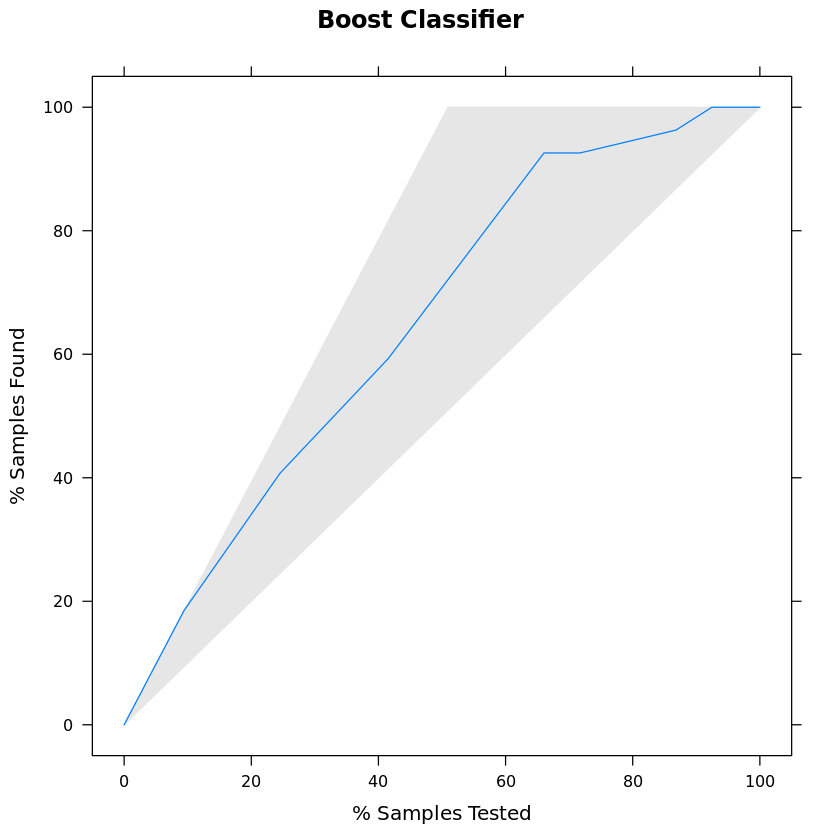

In [35]:
# Boost algorithm
library(adabag)
library(rpart)
library(caret)
boost <- boosting(D~.,data=training)
pred<-predict(boost,validate)
confusionMatrix(as.factor(pred$class),validate$D)
#Now create the associated lift chart
pred <- predict(boost,validate,type="prob")
plift.data <- data.frame(validate[,1],pred$prob[,2])
colnames(lift.data) <- c("actual","prob")
lift.logit <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
xyplot(lift.logit,label="gain",main="Boost Classifier")

[1]	train-rmse:0.818632 
[2]	train-rmse:0.611440 
[3]	train-rmse:0.453037 
[4]	train-rmse:0.339294 
[5]	train-rmse:0.265812 
[6]	train-rmse:0.204102 
[7]	train-rmse:0.157763 
[8]	train-rmse:0.123831 
[9]	train-rmse:0.097366 
[10]	train-rmse:0.077371 
[11]	train-rmse:0.062608 
[12]	train-rmse:0.049396 
[13]	train-rmse:0.040604 
[14]	train-rmse:0.032872 
[15]	train-rmse:0.026452 
[16]	train-rmse:0.021876 
[17]	train-rmse:0.018225 
[18]	train-rmse:0.015251 
[19]	train-rmse:0.012877 
[20]	train-rmse:0.010825 
[21]	train-rmse:0.009431 
[22]	train-rmse:0.008022 
[23]	train-rmse:0.006816 
[24]	train-rmse:0.005979 
[25]	train-rmse:0.005100 
[26]	train-rmse:0.004336 
[27]	train-rmse:0.003603 
[28]	train-rmse:0.003014 
[29]	train-rmse:0.002548 
[30]	train-rmse:0.002147 
[31]	train-rmse:0.001783 
[32]	train-rmse:0.001508 
[33]	train-rmse:0.001307 
[34]	train-rmse:0.001144 
[35]	train-rmse:0.001020 
[36]	train-rmse:0.000883 
[37]	train-rmse:0.000772 
[38]	train-rmse:0.000679 
[39]	train-rmse:0.000

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 22  4
         1  8 19
                                          
               Accuracy : 0.7736          
                 95% CI : (0.6379, 0.8772)
    No Information Rate : 0.566           
    P-Value [Acc > NIR] : 0.001354        
                                          
                  Kappa : 0.5483          
 Mcnemar's Test P-Value : 0.386476        
                                          
            Sensitivity : 0.7333          
            Specificity : 0.8261          
         Pos Pred Value : 0.8462          
         Neg Pred Value : 0.7037          
             Prevalence : 0.5660          
         Detection Rate : 0.4151          
   Detection Prevalence : 0.4906          
      Balanced Accuracy : 0.7797          
                                          
       'Positive' Class : 0               
                                          

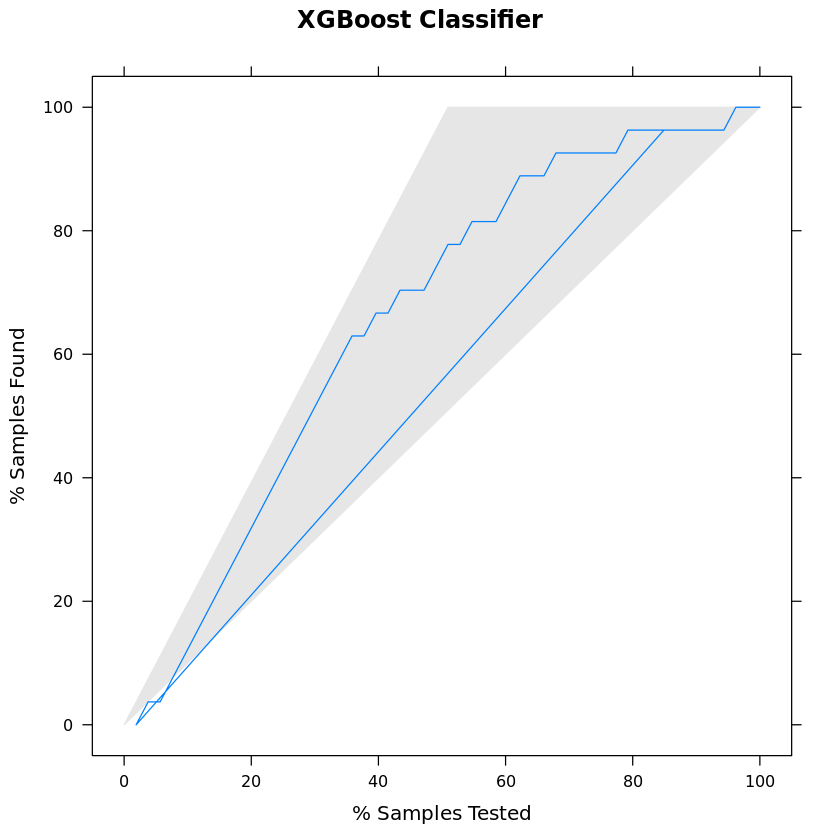

In [36]:
#XGBoost (Extreme Gradient Boosting) is a boosting algorithm based on 
#Gradient Boosting Machines.  XGboost applies regularization technique 
#to reduce overfitting, and it is one of the differences from the gradient 
# boosting. Another advantage of XGBoost over classical gradient boosting 
#is that it is fast in execution speed.
library(xgboost)
#Note, the training x data should be matrix type to use in xgboost model.
train_x <- data.matrix(training[,-1])
train_y <- training[,1]
test_x <- data.matrix(validate[,-1])
test_y <- validate[,1]
#Note that column 1 is the D variable 
#Next, we need to convert the train and test data into xgb matrix type.
xgb_train <- xgb.DMatrix(data=train_x, label=train_y)
xgb_test <- xgb.DMatrix(data=test_x, label=test_y)
xgbc <- xgboost(data=xgb_train, max.depth=6, nrounds=50) # Model building step
pred <- predict(xgbc, xgb_test)
pred_y = as.factor((levels(test_y))[round(pred)])
confusionMatrix(test_y, pred_y)

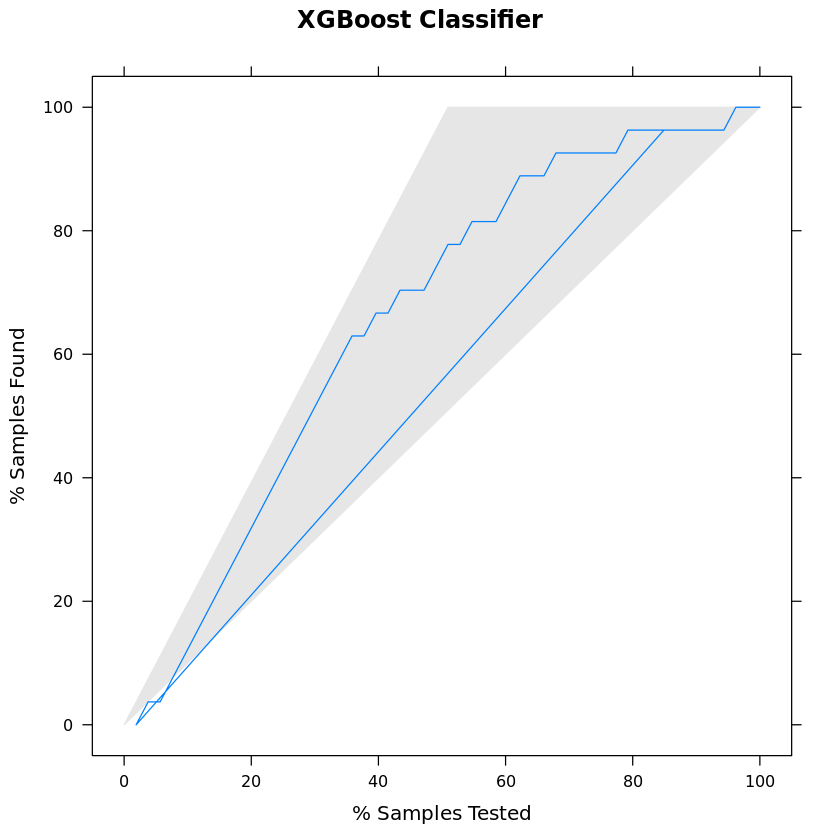

In [37]:
#Now create the associated lift chart
probabilities <- predict(xgbc,xgb_test,objective="multi:softprob")
lift.data <- data.frame(validate[,1],probabilities)
colnames(lift.data) <- c("actual","prob")
lift.xgboost <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
xyplot(lift.xgboost,plot="gain",main="XGBoost Classifier")
# The lift chart plot appears to be glitchy